# Градиентный спуск
Gradient Decent

$$f(x) \longrightarrow  \displaystyle \min_{x} $$
<br>
$$x_{t+1} = x_t-\alpha{f'(x_t)}$$
<br>
$$f_{t+1}(x) = f(x_t-\alpha{f'(x_t)})$$

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


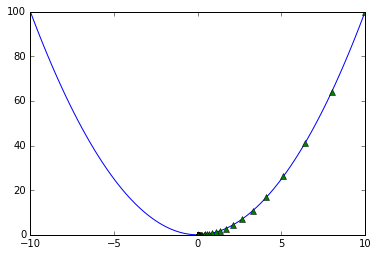

In [59]:
%matplotlib inline
%pylab inline

def func(x):
    return x ** 2

def derivative(x):
    return 2 * x


x_coord = np.linspace(-10, 10, 100)
_ = plot(x_coord, [func(x) for x in x_coord])

start_point = 10

alpha = 0.1
gradient_steps = [start_point]
for i in xrange(1000):
    old_point = gradient_steps[-1]
    new_point = old_point - alpha * derivative(old_point)
    gradient_steps.append(new_point)

_ = plot(gradient_steps, [func(x) for x in gradient_steps], 'g^',)

<img src="imgs/gradient-descent.png">

# Градиентный бустинг

$b_t(x)$ - ответ одного базового алгоритма (например, дерева), вещественное число для регрессии или [0, 1] - для классификации




Линейная комбинация базовых алгоритмов:
$$u(x) = \begin{equation*}
  \sum_{t=1}^{T} \alpha_t b_t(x)
\end{equation*}$$

Функционал качества с произвольной функицей потерь $L(u(x), y)$:
$$ Q(\overline u, \overline y) = \sum_{i=1}^{l} L\Bigl(u(x_i), y_i\Bigr) =   \begin{equation*}
  \sum_{i=1}^{l} L\Bigl(\sum_{t=1}^{T}\alpha_t b_t(x_i) + \alpha_{T+1} b_{T+1}(x_i), y_i\Bigr)
\end{equation*} \longrightarrow  \displaystyle \min_{\overline b, \overline \alpha} $$

Для регрессии L определяется как 
$$L == MSE == (y_i - u(x_i))^2$$
<center>или</center><br>
$$L == MAE == |y_i - u(x_i)|$$

Для классификации:
$$L = [ u(x_i) \cdot sign(y_i > 0.5) < 0 ]$$

Еще раз посмотрим на 2 формулы:
    
$$ Q_{T+1}(\overline u, \overline y) =  \begin{equation*}
  \sum_{i=1}^{l} L\Bigl(\sum_{t=1}^{T}\alpha_t b_t(x_i) + \alpha_{T+1} b_{T+1}(x_i), y_i\Bigr)
\end{equation*} $$

$$L_{t+1}(u) = L(u_t-\alpha{L'(u_t)})$$

Если бы $-\alpha{L'(x_t)}$ было бы в точности равно $\alpha_{T+1} b_{T+1}(x_i)$ , то это было бы в точности минимизацией функции $L$ и соотв. функции $Q$ градиентным спуском

Но мы не можем просто так приравнять $b_{T+1}(x_i)$ к $-L'(u_t)$
<br> 
Давайте попробуем построить дерево, которое будет очень похоже на $L'(u_t)$ на обучающей выборке. 
<br>
Обучаемся на $\Bigl[x_i, −L'(u_t(x_i))\Bigr]$ и получим таким образом $b_{T+1}$

Есть еще одна проблема: $L$ для классификации не дифференцируема по $x_i$. Заменим ее на мажорирующую:

<img src="imgs/2.jpg" width=500>

# Пример использования:     

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9555555555555556

In [58]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.93333333333333335

In [ ]:
XGBClassifier